<a href="https://colab.research.google.com/github/marcelodepaoli/15_Arvores_de_Decisao/blob/main/01_%C3%81rvores_de_Decis%C3%A3o_e_Florestas_Aleat%C3%B3rias_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de Decisão e Florestas Aleatórias em Python

## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtenha os dados

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

Vamos apenas verificar um gráfico de pares simples para este pequeno conjunto de dados.

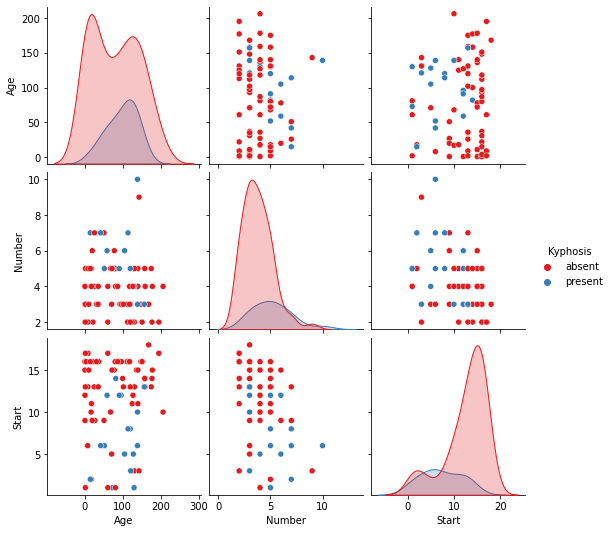

In [4]:
sns.pairplot(df,hue='Kyphosis', palette='Set1')

## Train Test Split

Vamos dividir os dados em um conjunto de treinamento e um conjunto de teste

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)

In [7]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [8]:
y = df['Kyphosis']

In [9]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [10]:
y = pd.get_dummies(y,columns='Kyphosis',drop_first=True)

In [11]:
y.head()

,present
0,0
1,0
2,1
3,0
4,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Árvores de decisão

Começaremos treinando uma única árvore de decisão.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Vamos avaliar nossa árvore de decisão.

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [26]:
print(confusion_matrix(y_test,predictions))

[[12  5]
 [ 6  2]]


## Visualização da Árvore

O Scikit learn na verdade tem alguns recursos de visualização integrados para árvores de decisão, você não utilizara esse recurso com frequência e é necessário instalar a biblioteca pydot

In [27]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [28]:
features = list(df.columns[1:])

In [29]:
features

['Age', 'Number', 'Start']

In [30]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True,impurity=False)

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

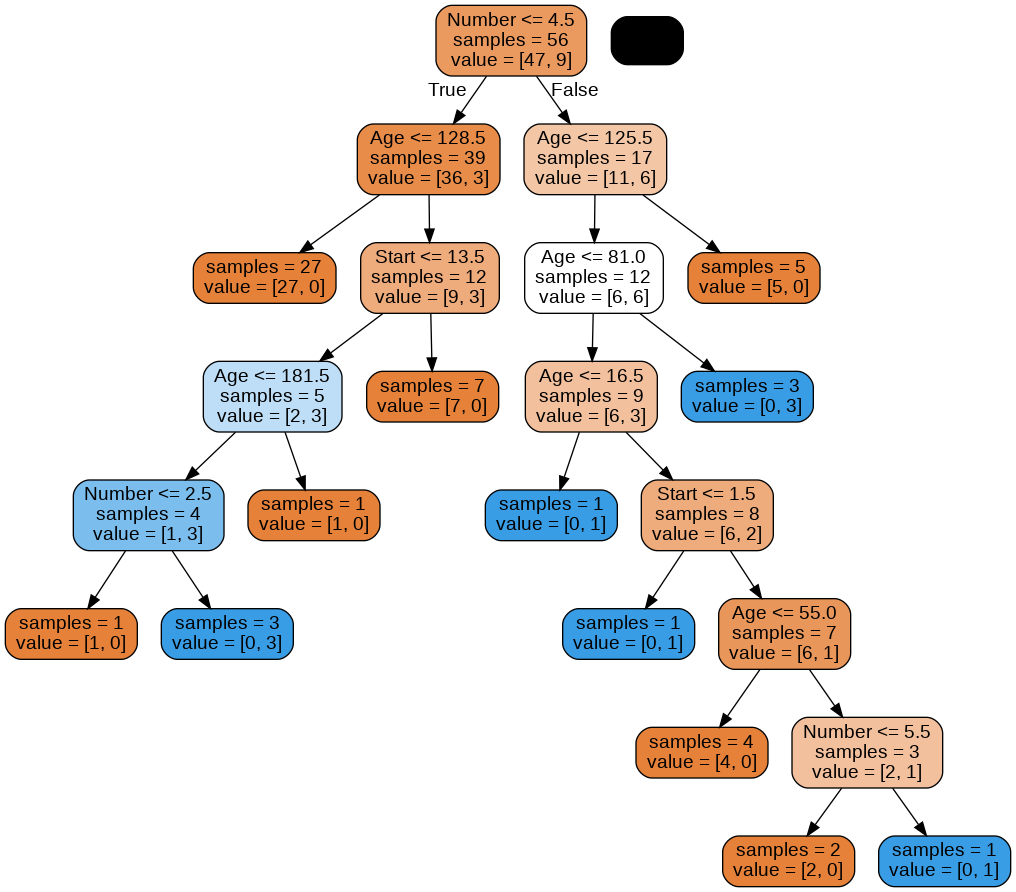

In [32]:
Image(graph.create_png())


## Florestas Aleatórias

Agora vamos comparar o modelo de árvore de decisão com uma floresta aleatória.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=100)

In [35]:
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [36]:
rfc_pred = rfc.predict(X_test)

In [37]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


In [38]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64